# Plot samples from GW specific sampling

The purpose of this notebook is to plot the samples from standard MCMC sampling of GW events

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
# sys.path.append("/Users/sperkins/dev/BayesShip/python/")
import bayesshippy.mcmcRoutines as mcmc
from corner import corner, overplot_lines
import os
import h5py
import emcee

## Read in data

In [2]:
output_file = "IMRPhenomPv3_injection_IMRPhenomPv3_recovery_output.hdf5"
print("Reading in file: ../data/"+output_file)
run = mcmc.MCMCOutput("../data/"+output_file)
print(r'$\beta$ parameters (1/T) for each chain in the run: ',run.betaSchedule)
betaID =0
print(r'Loading data for $\beta$ =',run.betaSchedule[betaID])
beta = run.betaSchedule[betaID]
dataObj = run.unpackMCMCData(betaID = betaID,sizeCap=2e4,thin=None,trim=None)
print("Total samples",len(dataObj["data"]))


dataObj["data"].loc[:,"Parameter 7"] = np.exp(dataObj["data"].loc[:,"Parameter 7"])
dataObj["data"].loc[:,"Parameter 6"] = np.exp(dataObj["data"].loc[:,"Parameter 6"])

Reading in file: ../data/IMRPhenomPv3_injection_IMRPhenomPv3_recovery_output.hdf5
$\beta$ parameters (1/T) for each chain in the run:  [1.         0.81350021 0.66990468 0.5358889  0.41946581 0.32529813
 0.25470082 0.20087119 0.1546903  0.11651441 0.08423152 0.05706555
 0.04885642 0.04668648 0.0416043  0.03270971 0.02282775 0.01203401
 0.00386886 0.        ]
Loading data for $\beta$ = 1.0
Total samples 12009


In [3]:
labels = [r'$\alpha$',r'$\sin \delta$',r'$\psi$',r'$\cos \iota$',
          r'$\phi_{\rm Ref}$',r'$t_c$',r'$D_L$',r'$\mathcal{M}$',
          r'$\eta$',r'$a_1$',r'$a_2$',r'\cos \theta_1',r'\cos \theta_2',r'\phi_1',r'\phi_1']

In [4]:
print("Loading injected (true) values)")
injections = np.loadtxt("../data/injections.csv")
injections[6] = np.exp(injections[6])
injections[7] = np.exp(injections[7])

Loading injected (true) values)


## Corner Plot

In [10]:
for injected, label in zip(injections, labels):
    print(label, injected)

$\alpha$ 1.375
$\sin \delta$ -0.935898117647133
$\psi$ 2.659
$\cos \iota$ 0.707106781186548
$\phi_{\rm Ref}$ 1.3
$t_c$ 14.0
$D_L$ 451.18899999999934
$\mathcal{M}$ 8.494870070359445
$\eta$ 0.24
$a_1$ 0.905538513813742
$a_2$ 0.15
\cos \theta_1 0.110431526074847
\cos \theta_2 -1.0
\phi_1 0.0
\phi_1 0.0


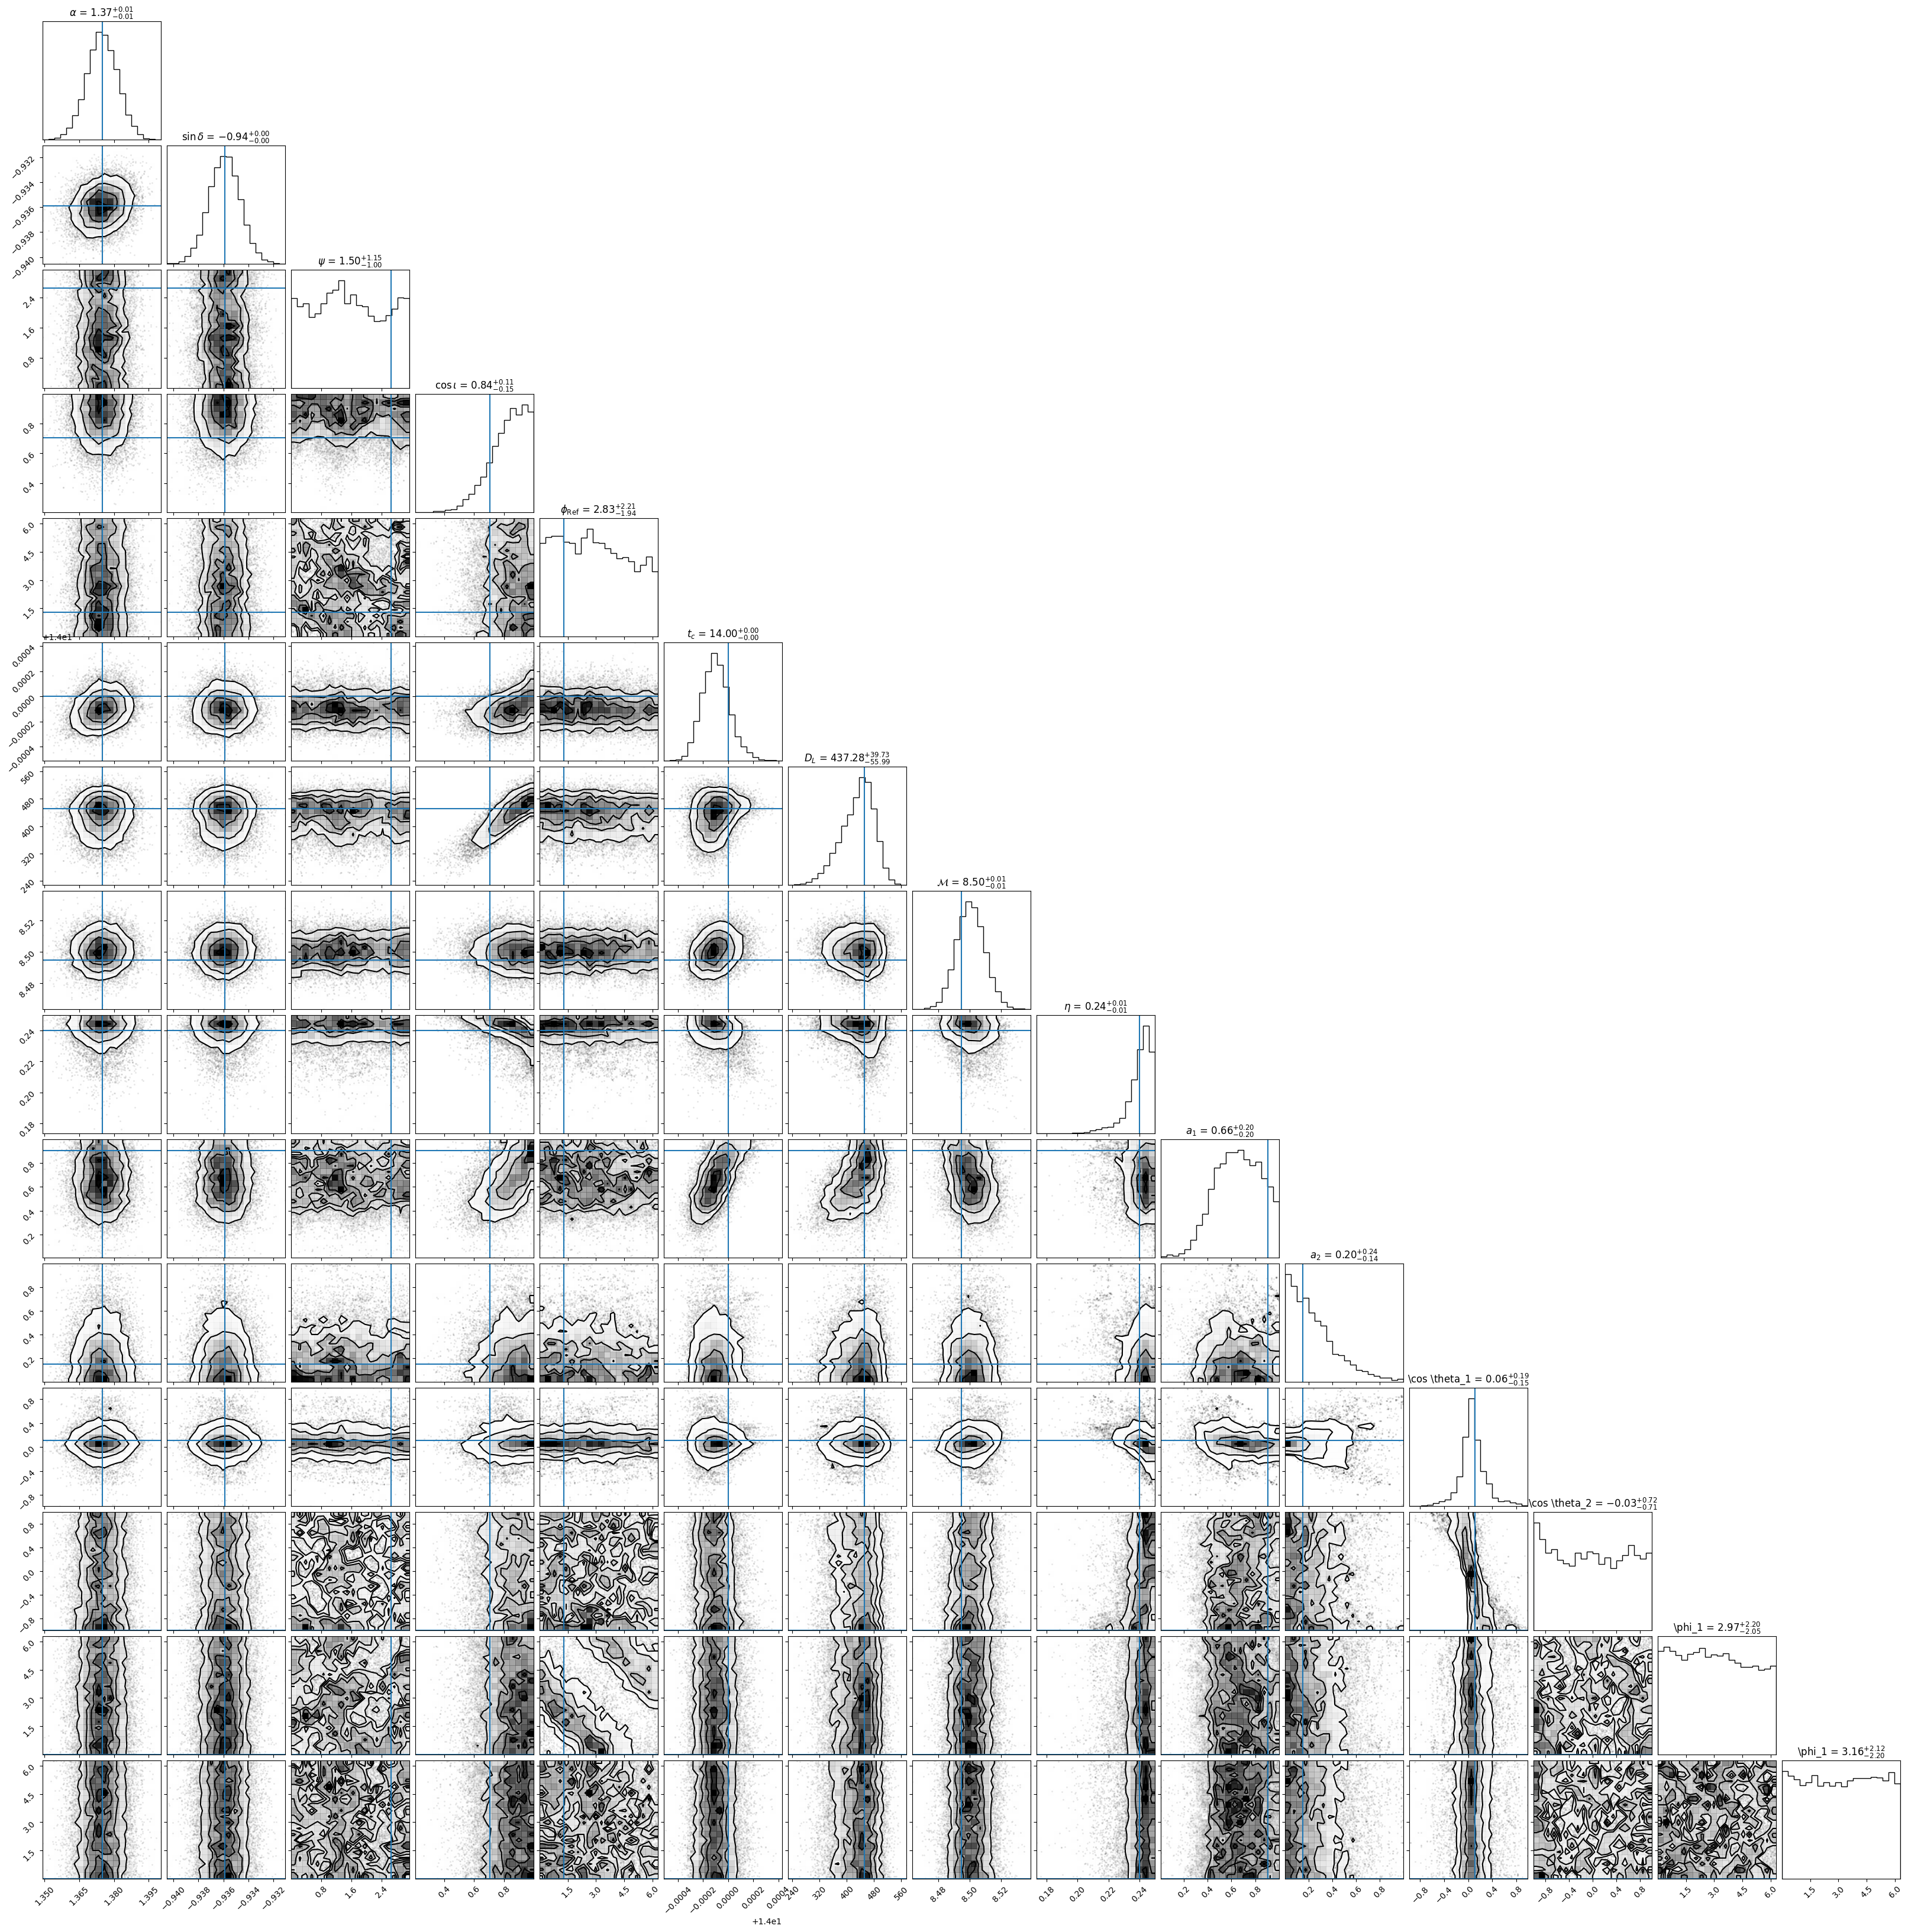

In [11]:
figure = corner(dataObj["data"],show_titles=True, titles=labels)
overplot_lines(figure, injections)

# plt.savefig("corner.pdf")
plt.show()
plt.close()

## Trace Plots

[0.98747423]


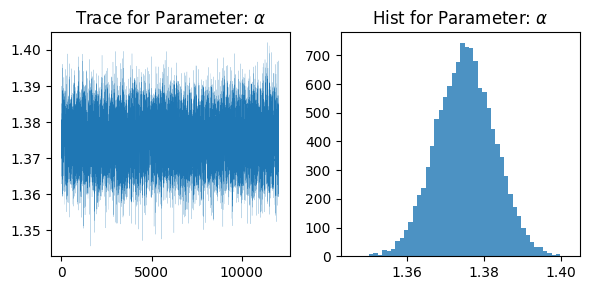

##################################################
[1.10074203]


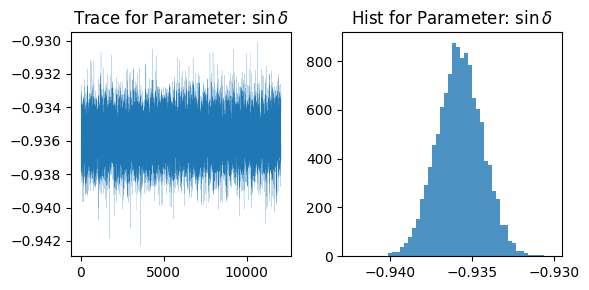

##################################################
[1.39429192]


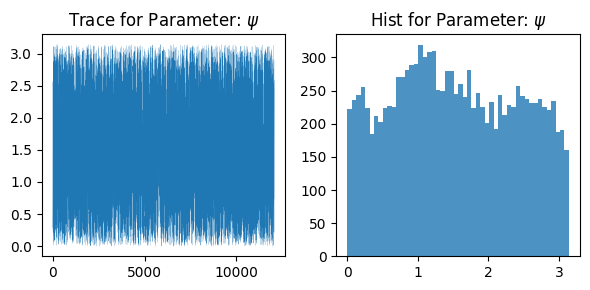

##################################################
[1.37002287]


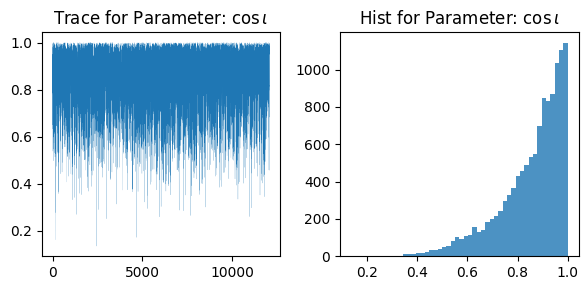

##################################################
[1.56380141]


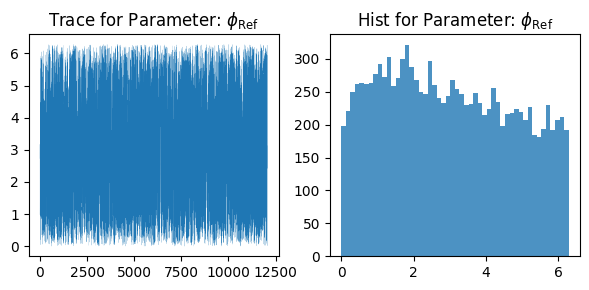

##################################################
[1.23233817]


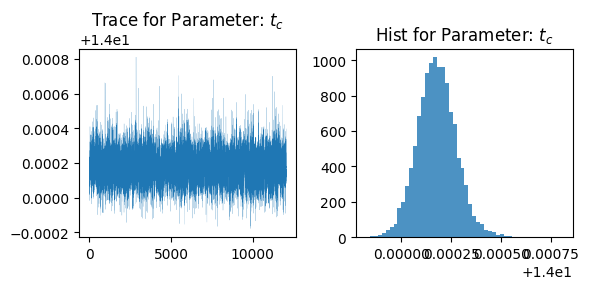

##################################################
[1.38832413]


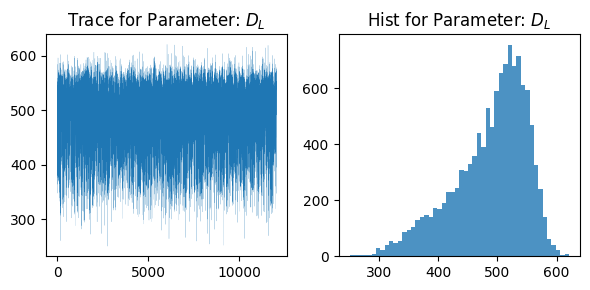

##################################################
[1.21836802]


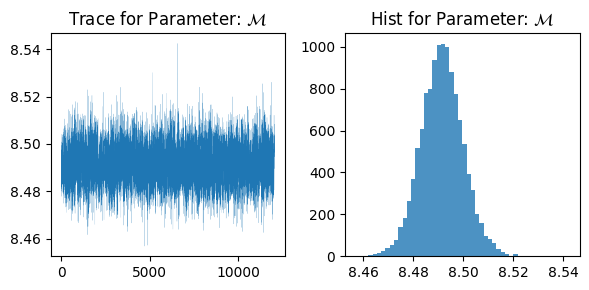

##################################################
[1.73383931]


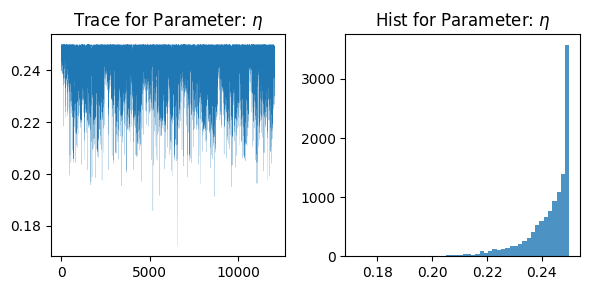

##################################################
[1.52195187]


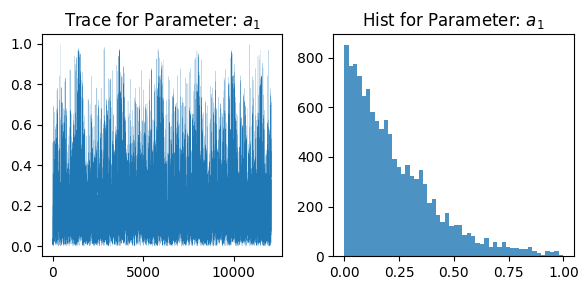

##################################################
[1.93169648]


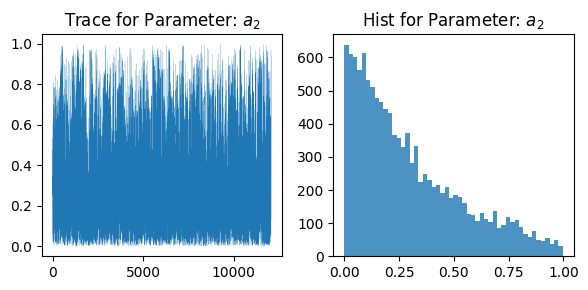

##################################################
[1.56756905]


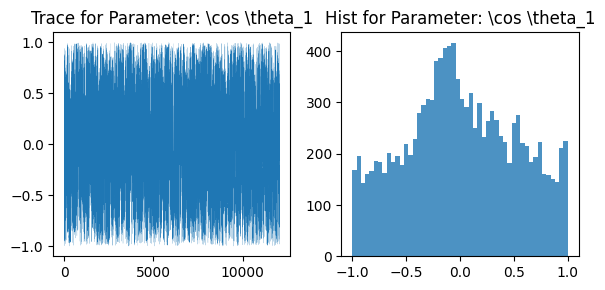

##################################################
[1.39416827]


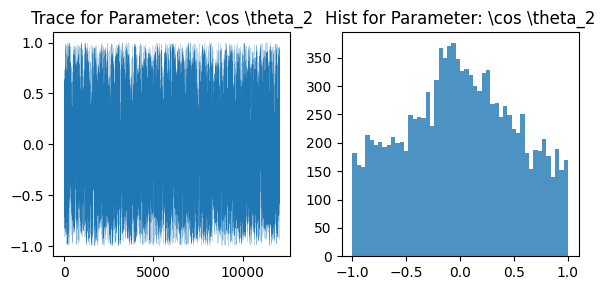

##################################################
[1.27848483]


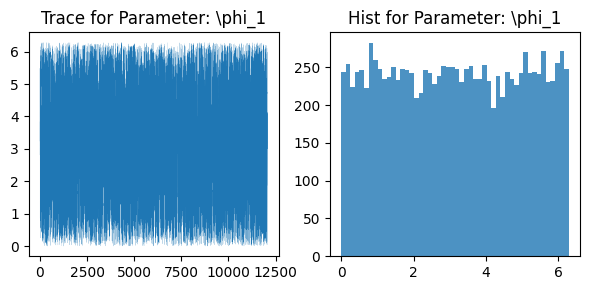

##################################################
[1.40108088]


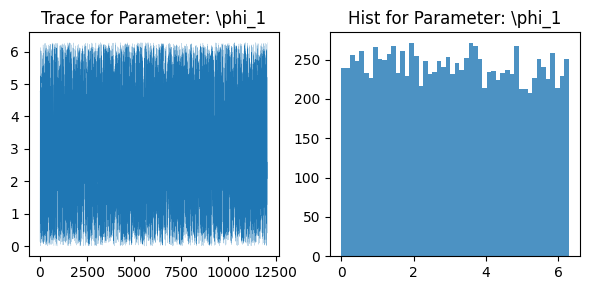

##################################################


In [15]:
for ID in np.arange(len(dataObj["data"].iloc[0])):
    data = dataObj["data"]
    
    print(emcee.autocorr.integrated_time(data.iloc[:,ID],tol=1))
    fig, ax = plt.subplots(nrows=1,ncols=2,figsize=[6,3])
    # ax[0].scatter(np.arange(len(datafull[0][np.array(datafull[1][:,ID],dtype=bool)])),datafull[0][np.array(datafull[1][:,ID],dtype=bool),ID],s=.01)
    ax[0].plot(data.iloc[:,ID],linewidth=.1)

    ax[0].set_title("Trace for Parameter: {}".format(labels[ID]))


    ax[1].hist(data.iloc[:,ID],bins=50,alpha=.8, label='posterior density')
    # ax[1].legend()
    ax[1].set_title("Hist for Parameter: {}".format(labels[ID]))
    plt.tight_layout()
    
    plt.show()
    plt.close()
    print(50*"#")

## AC Plots

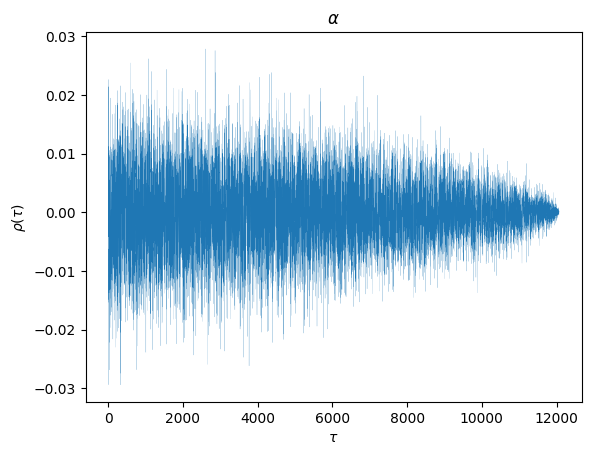

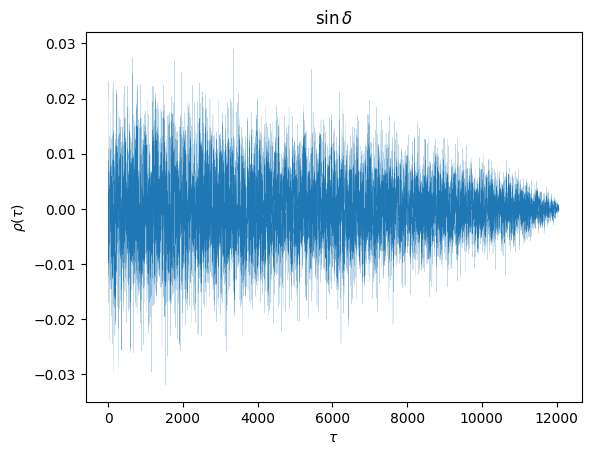

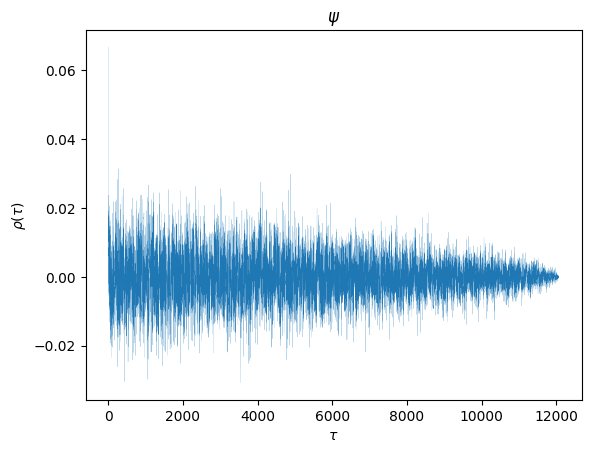

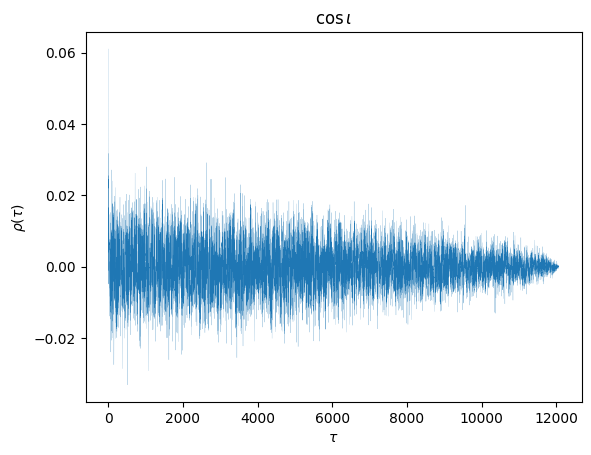

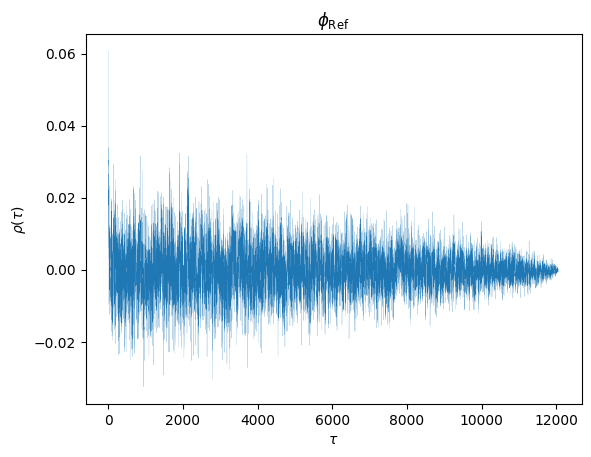

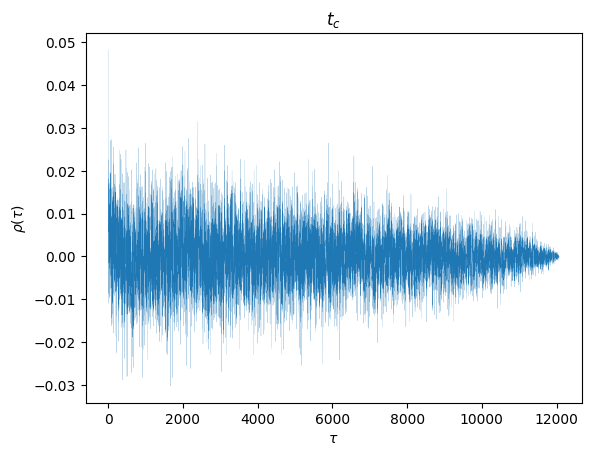

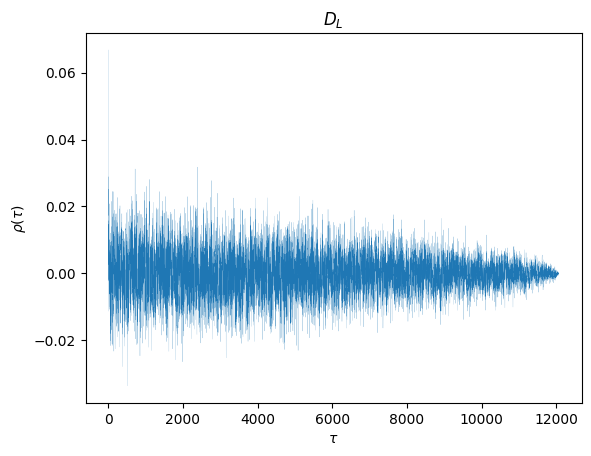

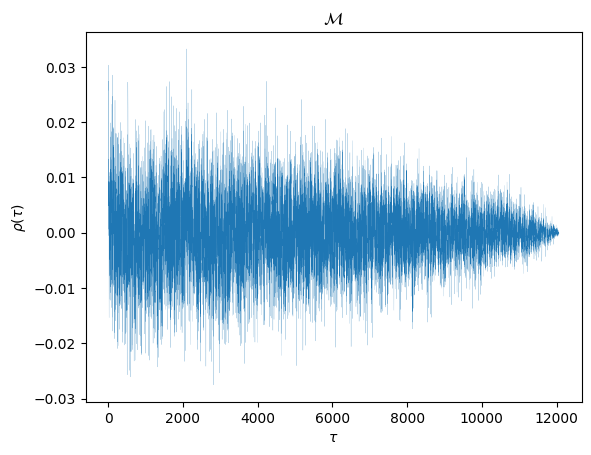

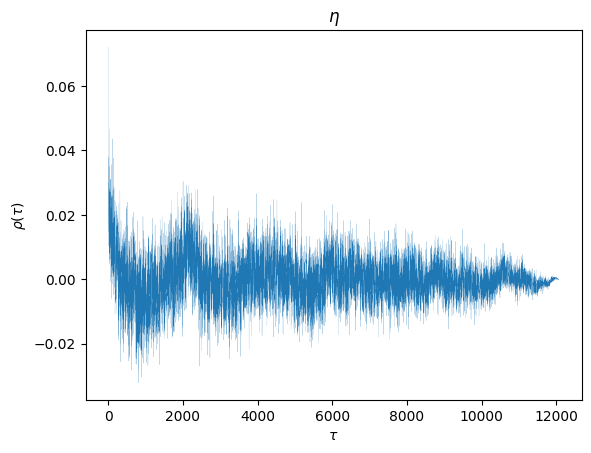

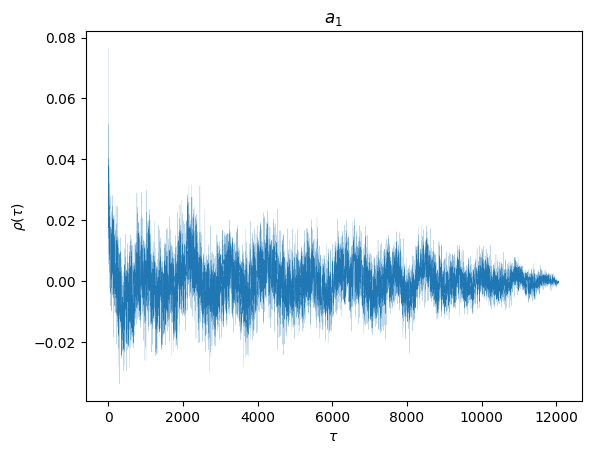

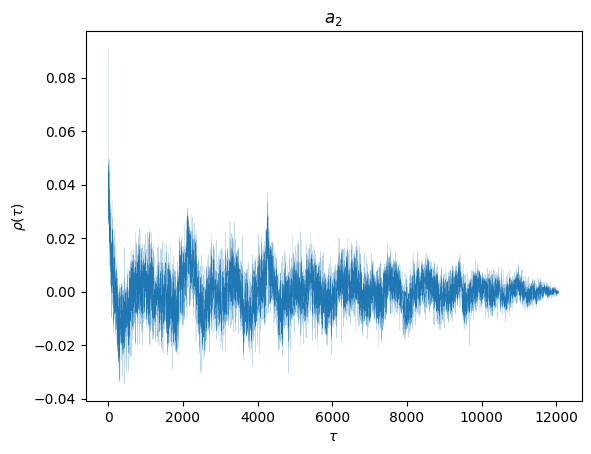

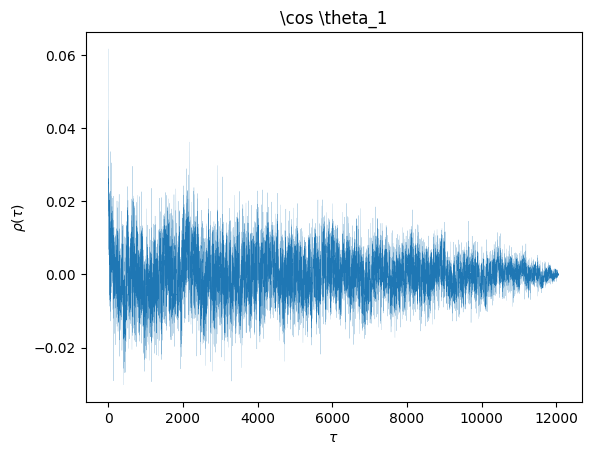

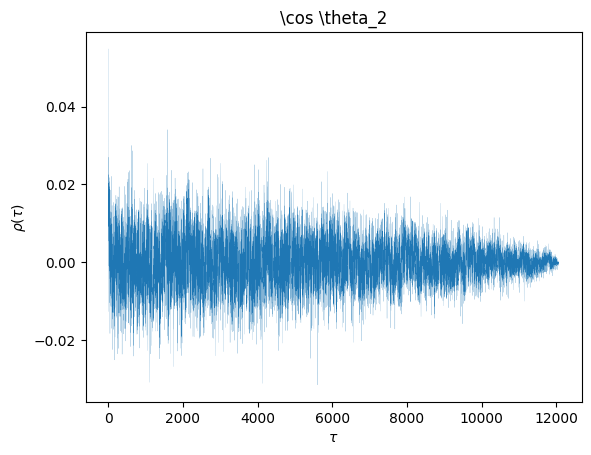

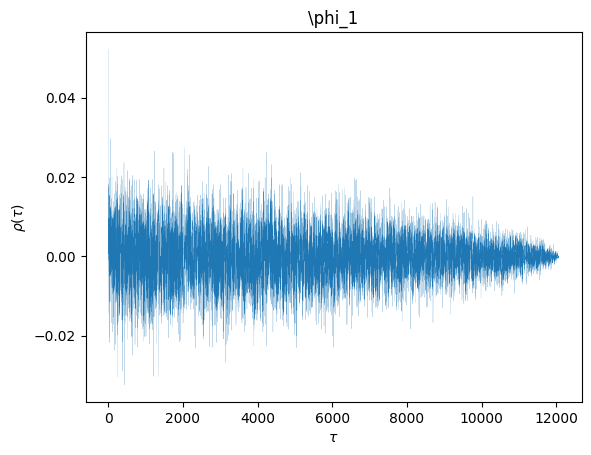

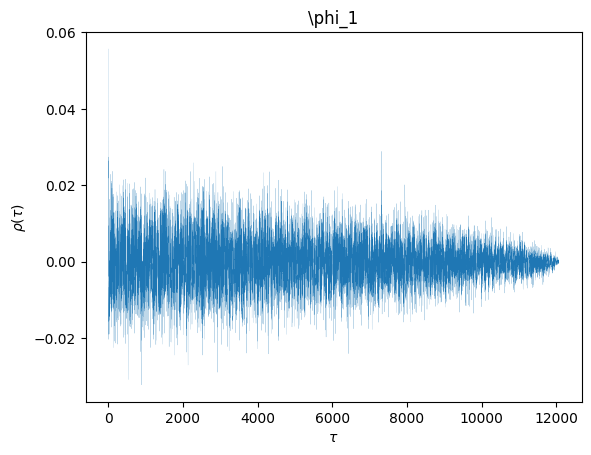

In [16]:
for i in np.arange(len(dataObj["data"].iloc[0])):
    ac =emcee.autocorr.function_1d(dataObj["data"].loc[:,"Parameter {}".format(i)].to_numpy() )

    plt.plot(ac[1:],linewidth=.1)
    plt.title(labels[i])
    plt.xlabel(r'$\tau$')
    plt.ylabel(r'$\rho(\tau)$')

    
    plt.show()
    plt.close()

## $\ln$ Likelihood/Prior/Posterior Trace Plots

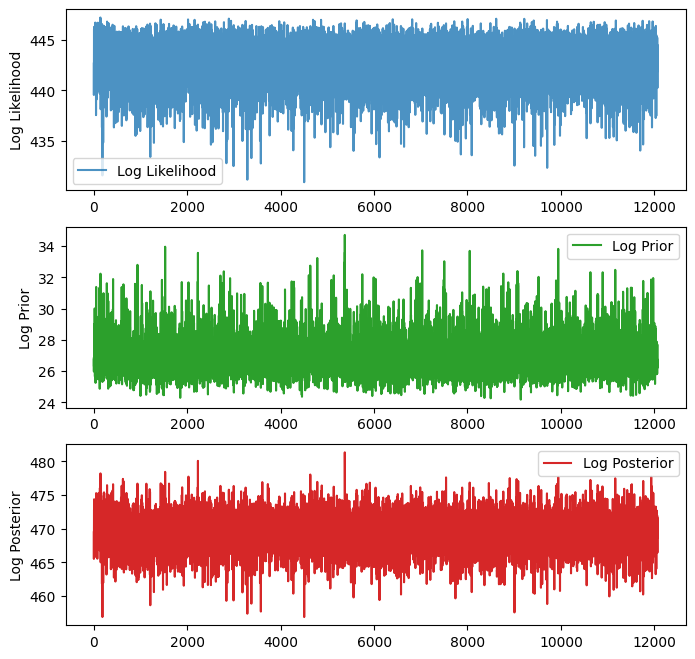

In [17]:
# ll = dataObj["logL"][mask]
# lp = dataObj["logP"][mask]
ll = dataObj["logL"]
lp = dataObj["logP"]
 
fig, ax = plt.subplots(nrows=3,ncols=1,figsize=[8,8])
# ax[0].axhline(200,color='red',label='Theoretical Max')
ax[0].plot(ll,alpha=.8, label="Log Likelihood",color='tab:blue')
ax[0].set_ylabel("Log Likelihood")
ax[0].legend()
ax[1].plot(lp, label="Log Prior",color='tab:green')
ax[1].set_ylabel("Log Prior")
ax[1].legend()

ax[2].plot(lp+ll, label="Log Posterior",color='tab:red')
ax[2].set_ylabel("Log Posterior")
ax[2].legend()

plt.show()
plt.close()

In [ ]:
plt.hist(ll)